<a href="https://colab.research.google.com/github/crissyro/Deep-learning-courses/blob/main/notebooks/optimization_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install torchmetrics pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [2]:
import os
import random
import sys

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

from tqdm import tqdm

In [3]:
def seed_everything(seed: int) -> None:
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True

seed_everything(0xBADBEEF)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

device

device(type='cuda')

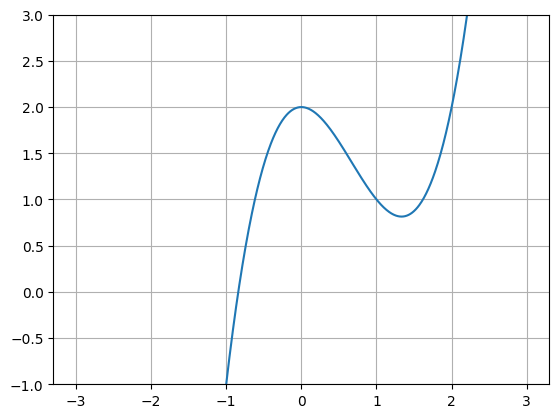

In [4]:
func = lambda x: x**3 - 2 * x**2 + 2
d_func = lambda x: 3 * x**2 - 4 * x

x = np.linspace(-3, 3, 1000)

plt.ylim([-1, 3])
plt.plot(x, func(x))
plt.grid()

In [5]:
def find_min_fisrt_order(
    lr = 0.01,
    eps = 1e-4,
    max_iterations = 1000,
    anneal_learning_rate = None
):
  x_old, x_new = 0, 2

  x_list, y_list = [x_new], [func(x_new)]

  if not anneal_learning_rate:
    anneal_learning_rate = lambda lr, step: lr

  for i in range(max_iterations):
    if abs(x_old - x_new) < eps:
      break

    lr = anneal_learning_rate(lr, i + 1)

    x_old = x_new
    x_new = x_old - lr * d_func(x_old)

    x_list.append(x_new)
    y_list.append(func(x_new))

  print('Найден локальный минимум: ', x_new)
  print('Количество шагов:', len(x_list))

  plt.figure(figsize=(4, 6))
  plt.ylim([-3, 8])
  plt.scatter(x_list, y_list, c='r', edgecolors='k')
  plt.plot(x_list, y_list, c='r')
  plt.plot(x, func(x), c='b')
  plt.title('Descent trajectory')
  plt.grid()
  plt.show()



Найден локальный минимум:  1.3356881625009205
Количество шагов: 129


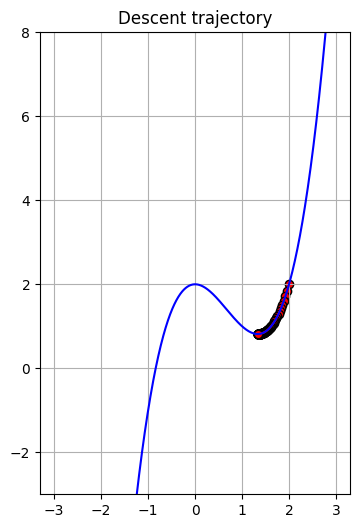

In [6]:
find_min_fisrt_order()

Найден локальный минимум:  1.7169043395050614
Количество шагов: 1001


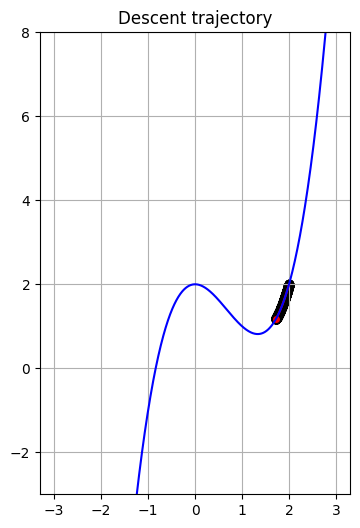

In [7]:
find_min_fisrt_order(0.0001)

Найден локальный минимум:  1.3333495713163788
Количество шагов: 8


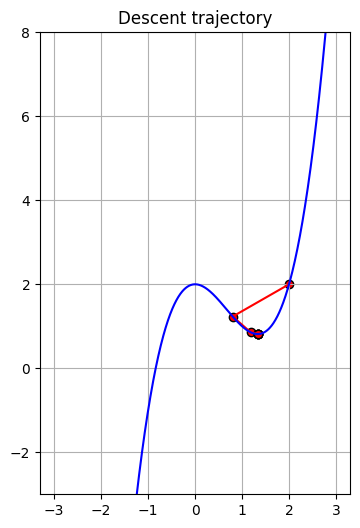

In [8]:
find_min_fisrt_order(0.3)

Найден локальный минимум:  1.3333802058189816
Количество шагов: 96


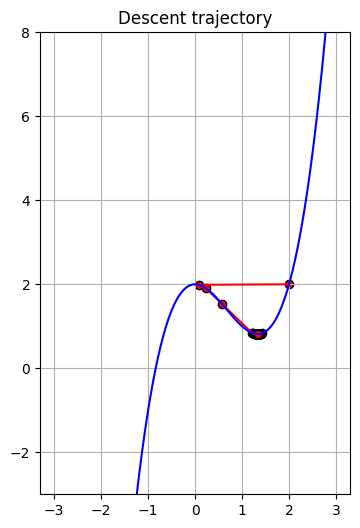

In [9]:
find_min_fisrt_order(0.48)

Найден локальный минимум:  1.294744839667743
Количество шагов: 7


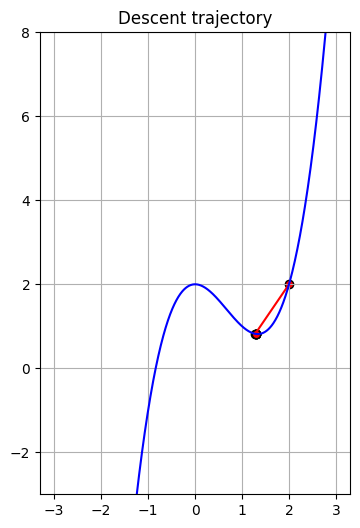

In [10]:
find_min_fisrt_order(0.6, anneal_learning_rate=lambda lr, step: 0.3 * lr)

In [ ]:
?torch.optim.SGD

In [11]:
model = torch.nn.Linear(1, 1)
list(model.named_parameters()), torch.optim.SGD(model.parameters(), lr=0.01)

([('weight',
   Parameter containing:
   tensor([[-0.1194]], requires_grad=True)),
  ('bias',
   Parameter containing:
   tensor([0.4259], requires_grad=True))],
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [12]:
from collections import defaultdict, namedtuple

import pytorch_lightning as pl
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy

In [13]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    train=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

fashion_mnist_val = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    train=False,
    transform=transforms.Compose([transforms.ToTensor()])
)

train_dataloader = DataLoader(
    fashion_mnist_train,
    shuffle=True,
    batch_size=128,
    num_workers=4,
)

val_dataloader = DataLoader(
    fashion_mnist_val,
    shuffle=False,
    batch_size=128,
    num_workers=4,
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 171kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.9MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [14]:
idx_to_label = defaultdict(
    None,
    {
        0: 'T-shirt/Top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle Boot',
    },
)

Ankle Boot


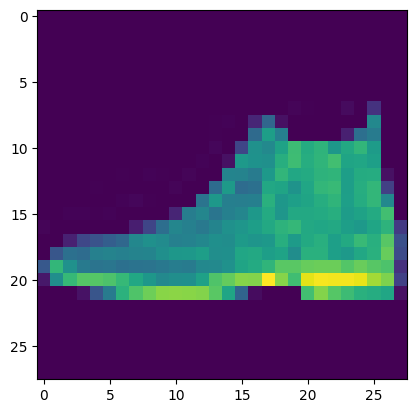

Coat


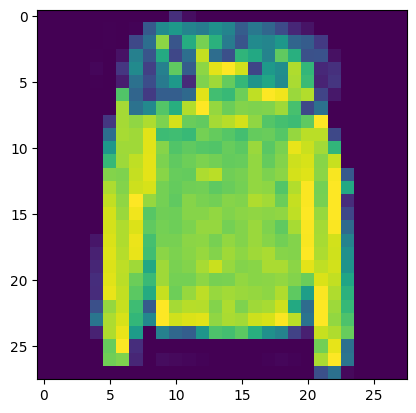

In [15]:
for batch in val_dataloader:
  img, label = batch

  print(idx_to_label[int(label[0])])
  plt.imshow(img[0].squeeze())
  plt.show()

  print(idx_to_label[int(label[127])])
  plt.imshow(img[127].squeeze())
  plt.show()

  break


In [20]:
import torch.nn as nn

class SimpleNet(nn.Module):
  def __init__(self, droupout=0.4):
    super().__init__()

    self.batchnorm1 = nn.BatchNorm2d(1)
    self.batchnorm2 = nn.BatchNorm2d(32)

    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2)

    self.conv_1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
        self.relu,
        self.pool,
    )

    self.conv_2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
        self.relu,
        self.pool,
    )

    self.flatten = nn.Flatten()
    self.droupout = nn.Dropout(p=droupout)

    self.fc_1 = nn.Linear(5 * 5 * 64, 128)
    self.fc_2 = nn.Linear(128, 64)
    self.fc_3 = nn.Linear(64, 10)

    self.loss_func = nn.CrossEntropyLoss()
    self.targets = torch.Tensor()
    self.preds = torch.Tensor()

  def _forward(self, x):
    x = self.batchnorm1(x)
    x = self.conv_1(x)
    x = self.batchnorm2(x)
    x = self.conv_2(x)
    x = self.flatten(x)

    x = self.fc_1(x)
    x = self.relu(x)
    x = self.droupout(x)
    x = self.fc_2(x)
    x = self.relu(x)
    x = self.fc_3(x)

    return x

  def forward(self, images, target=None):
    output = self._forward(images)

    if target is not None:
      loss = self.loss_func(output, target)

      self.targets = torch.cat((self.targets, target.cpu()), 0)
      pred = torch.argmax(output, dim=1)
      self.preds = torch.cat((self.preds, pred.cpu()), 0)
      self.accuracy = accuracy(
          self.preds.long(),
          self.targets.long(),
          task='multiclass',
          num_classes=10
      )

    return loss

  def get_accuracy(self, reset=False):
    if reset:
      self.targets = torch.Tensor()
      self.preds = torch.Tensor()

    return self.accuracy

In [21]:
LossInfo = namedtuple(
    'LossInfo', ['full_train_losses', 'train_epoch_losses', 'eval_epoch_losses']
)

EPOCHS = 10
LR = 0.001

In [49]:
def train_epoch(
    model,
    data_loader,
    optimizer,
    return_losses=False,
    device='cuda:0'
):
  model = model.train()
  total_loss = 0
  num_batches = 0
  all_losses = []

  with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
    for batch in data_loader:
      batch = [x.to(device=device) for x in batch]
      loss = model(*batch)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      accuracy = model.get_accuracy()

      prbar.set_description(
          f'Loss: {round(loss.item(), 4)}'
          f'Accuracy: {round(accuracy.item() * 100, 4)}'
      )
      prbar.update(1)
      total_loss += loss.item()
      num_batches += 1
      all_losses.append(loss.detach().item())

  acc = model.get_accuracy(reset=True)
  metrics = {'loss': total_loss / num_batches, 'acc': acc}

  if return_losses:
    return metrics, all_losses
  else:
    return metrics

def validate(
    model,
    data_loader,
    device='cuda:0'
):
  model = model.eval()
  total_loss = 0
  num_batches = 0

  with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
    for batch in data_loader:
      batch = [x.to(device=device) for x in batch]
      loss = model(*batch)

      accuracy = model.get_accuracy()

      prbar.set_description(
          f'Loss: {round(loss.item(), 4)}'
          f'.   Accuracy: {round(accuracy.item() * 100, 4)}'
      )
      prbar.update(1)
      total_loss += loss.item()
      num_batches += 1

  acc = model.get_accuracy(reset=True)
  metrics = {'loss': total_loss / num_batches, 'acc': acc}

  return metrics

def fit(
    model,
    epochs,
    train_data_loader,
    validation_data_loader,
    optimizer,
    scheduler=None,
    device='cuda:0'
):
  all_train_losses = []
  epoch_train_losses = []
  epoch_eval_losses = []

  for epoch in range(epochs):
    train_iter = iter(train_data_loader)
    val_iter = iter(validation_data_loader)

    print(f'Train Epoch: {epoch}')

    train_metrics, one_epoch_train_losses = train_epoch(
        model,
        train_iter,
        optimizer,
        return_losses=True,
        device=device
    )

    all_train_losses.extend(one_epoch_train_losses)
    epoch_train_losses.append(train_metrics['loss'])

    print(f'Validation Epoch: {epoch}')

    with torch.no_grad():
      validation_metrics = validate(
          model,
          val_iter,
          device
      )

    epoch_eval_losses.append(validation_metrics['loss'])

    if scheduler:
          scheduler.step()

  return LossInfo(all_train_losses, epoch_train_losses, epoch_eval_losses)

In [50]:
model = SimpleNet().to(device)

_ = fit(
    model,
    epochs=1,
    train_data_loader=train_dataloader,
    validation_data_loader=val_dataloader,
    optimizer=torch.optim.SGD(model.parameters(), lr=LR),
    device=device
)

Train Epoch: 0
Loss: 2.223Accuracy: 19.3017: 100%|██████████| 469/469 [00:10<00:00, 45.90it/s]
Validation Epoch: 0
Loss: 2.2301Accuracy: 37.67: 100%|██████████| 79/79 [00:01<00:00, 51.71it/s]


In [30]:
class SimpleModule(pl.LightningModule):
  def __init__(self, model, lr=0.01):
    super().__init__()
    self.model = model
    self.lr = lr

  def forward(self, x):
    return self.model(x)

  def configure_optimizers(self):
    return torch.optim.Adam(self.model.parameters(), lr=self.lr)

  def training_step(self, batch, batch_idx):
      images, targets = batch
      loss = self.model(images, targets)

      self.log("train_loss", loss, prog_bar=True)
      return loss

  def validation_step(self, batch, batch_idx):
      images, targets = batch
      loss = self.model(images, targets)

      self.log("val_loss", loss, prog_bar=True)
      return loss

In [32]:
model = SimpleNet().to(device)
module = SimpleModule(model, lr=LR)

print("Total parameters:", sum(p.numel() for p in model.parameters()))

trainer = pl.Trainer(
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    max_epochs=3,
    enable_progress_bar=True
)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params | Mode 
--------------------------------------------
0 | model | SimpleNet | 232 K  | train
--------------------------------------------
232 K     Trainable params
0         Non-trainable params
232 K     Total params
0.931     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


Total parameters: 232716


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [51]:
model = SimpleNet().to(device)

EPOCHS = 15

sgd_loss_info = fit(
    model,
    EPOCHS,
    train_dataloader,
    val_dataloader,
    torch.optim.SGD(model.parameters(), lr=LR),
    device=device,
)

Train Epoch: 0
Loss: 2.156Accuracy: 24.18: 100%|██████████| 469/469 [00:09<00:00, 49.45it/s]
Validation Epoch: 0
Loss: 2.1445Accuracy: 42.84: 100%|██████████| 79/79 [00:01<00:00, 44.50it/s]
Train Epoch: 1
Loss: 1.9145Accuracy: 40.1433: 100%|██████████| 469/469 [00:09<00:00, 49.55it/s]
Validation Epoch: 1
Loss: 1.8272Accuracy: 48.06: 100%|██████████| 79/79 [00:01<00:00, 56.16it/s]
Train Epoch: 2
Loss: 1.4195Accuracy: 48.6583: 100%|██████████| 469/469 [00:09<00:00, 47.60it/s]
Validation Epoch: 2
Loss: 1.3613Accuracy: 62.87: 100%|██████████| 79/79 [00:01<00:00, 63.04it/s]
Train Epoch: 3
Loss: 1.2028Accuracy: 57.94: 100%|██████████| 469/469 [00:10<00:00, 44.71it/s]
Validation Epoch: 3
Loss: 1.0244Accuracy: 68.72: 100%|██████████| 79/79 [00:01<00:00, 63.21it/s]
Train Epoch: 4
Loss: 1.1103Accuracy: 62.5683: 100%|██████████| 469/469 [00:10<00:00, 45.44it/s]
Validation Epoch: 4
Loss: 0.8118Accuracy: 71.08: 100%|██████████| 79/79 [00:01<00:00, 63.17it/s]
Train Epoch: 5
Loss: 1.0274Accuracy: 66.

In [52]:
model = SimpleNet().to(device)

sgd_momentim_loss_info = fit(
    model,
    EPOCHS,
    train_dataloader,
    val_dataloader,
    torch.optim.SGD(model.parameters(), momentum=0.9, lr=LR),
    device=device,
)

Train Epoch: 0
Loss: 0.6943Accuracy: 55.315: 100%|██████████| 469/469 [00:10<00:00, 45.26it/s]
Validation Epoch: 0
Loss: 0.4292Accuracy: 75.3: 100%|██████████| 79/79 [00:01<00:00, 62.99it/s]
Train Epoch: 1
Loss: 0.6837Accuracy: 76.575: 100%|██████████| 469/469 [00:10<00:00, 45.33it/s]
Validation Epoch: 1
Loss: 0.3142Accuracy: 79.47: 100%|██████████| 79/79 [00:01<00:00, 62.19it/s]
Train Epoch: 2
Loss: 0.5181Accuracy: 80.29: 100%|██████████| 469/469 [00:10<00:00, 44.28it/s]
Validation Epoch: 2
Loss: 0.2411Accuracy: 82.15: 100%|██████████| 79/79 [00:01<00:00, 61.81it/s]
Train Epoch: 3
Loss: 0.4155Accuracy: 82.9567: 100%|██████████| 469/469 [00:10<00:00, 44.83it/s]
Validation Epoch: 3
Loss: 0.22Accuracy: 83.76: 100%|██████████| 79/79 [00:01<00:00, 54.23it/s]
Train Epoch: 4
Loss: 0.3565Accuracy: 84.725: 100%|██████████| 469/469 [00:12<00:00, 38.79it/s]
Validation Epoch: 4
Loss: 0.2491Accuracy: 85.01: 100%|██████████| 79/79 [00:01<00:00, 57.90it/s]
Train Epoch: 5
Loss: 0.4326Accuracy: 85.683

In [53]:
model = SimpleNet().to(device)

rmsprop_loss_info = fit(
    model,
    EPOCHS,
    train_dataloader,
    val_dataloader,
    torch.optim.RMSprop(model.parameters(), lr=LR),
    device=device,
)

Train Epoch: 0
Loss: 0.3204Accuracy: 79.68: 100%|██████████| 469/469 [00:09<00:00, 47.13it/s]
Validation Epoch: 0
Loss: 0.1794Accuracy: 86.53: 100%|██████████| 79/79 [00:01<00:00, 48.57it/s]
Train Epoch: 1
Loss: 0.2464Accuracy: 87.04: 100%|██████████| 469/469 [00:09<00:00, 47.18it/s]
Validation Epoch: 1
Loss: 0.2392Accuracy: 88.62: 100%|██████████| 79/79 [00:01<00:00, 43.44it/s]
Train Epoch: 2
Loss: 0.4618Accuracy: 88.6383: 100%|██████████| 469/469 [00:09<00:00, 50.14it/s]
Validation Epoch: 2
Loss: 0.1913Accuracy: 87.11: 100%|██████████| 79/79 [00:01<00:00, 47.04it/s]
Train Epoch: 3
Loss: 0.2372Accuracy: 89.58: 100%|██████████| 469/469 [00:09<00:00, 48.62it/s]
Validation Epoch: 3
Loss: 0.179Accuracy: 89.41: 100%|██████████| 79/79 [00:01<00:00, 54.88it/s]
Train Epoch: 4
Loss: 0.2623Accuracy: 90.4333: 100%|██████████| 469/469 [00:09<00:00, 47.40it/s]
Validation Epoch: 4
Loss: 0.1449Accuracy: 88.92: 100%|██████████| 79/79 [00:01<00:00, 63.12it/s]
Train Epoch: 5
Loss: 0.2076Accuracy: 91.13

In [54]:
model = SimpleNet().to(device)

adam_loss_info = fit(
    model,
    EPOCHS,
    train_dataloader,
    val_dataloader,
    torch.optim.Adam(model.parameters(), lr=LR),
    device=device,
)

Train Epoch: 0
Loss: 0.3079Accuracy: 81.2567: 100%|██████████| 469/469 [00:10<00:00, 46.16it/s]
Validation Epoch: 0
Loss: 0.2616Accuracy: 87.39: 100%|██████████| 79/79 [00:01<00:00, 56.06it/s]
Train Epoch: 1
Loss: 0.245Accuracy: 87.8583: 100%|██████████| 469/469 [00:10<00:00, 46.49it/s]
Validation Epoch: 1
Loss: 0.156Accuracy: 88.47: 100%|██████████| 79/79 [00:01<00:00, 46.86it/s]
Train Epoch: 2
Loss: 0.2178Accuracy: 89.4983: 100%|██████████| 469/469 [00:09<00:00, 49.68it/s]
Validation Epoch: 2
Loss: 0.1719Accuracy: 89.62: 100%|██████████| 79/79 [00:01<00:00, 45.12it/s]
Train Epoch: 3
Loss: 0.2938Accuracy: 90.4317: 100%|██████████| 469/469 [00:09<00:00, 49.12it/s]
Validation Epoch: 3
Loss: 0.0983Accuracy: 90.37: 100%|██████████| 79/79 [00:01<00:00, 54.76it/s]
Train Epoch: 4
Loss: 0.1924Accuracy: 91.11: 100%|██████████| 469/469 [00:10<00:00, 46.24it/s]
Validation Epoch: 4
Loss: 0.1012Accuracy: 90.56: 100%|██████████| 79/79 [00:01<00:00, 63.86it/s]
Train Epoch: 5
Loss: 0.2217Accuracy: 91

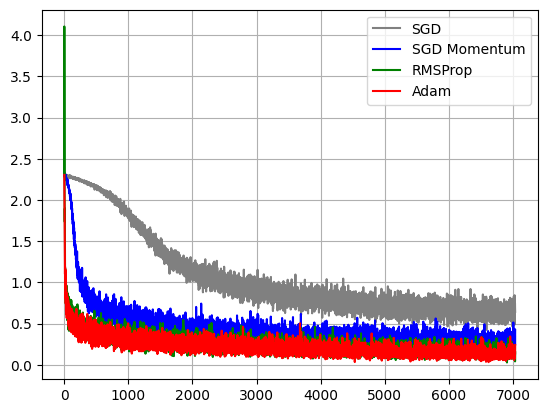

In [56]:
plt.plot(
    np.arange(len(train_dataloader) * 15),
    sgd_loss_info.full_train_losses,
    label='SGD',
    c='grey',
)

plt.plot(
    np.arange(len(train_dataloader) * 15),
    sgd_momentim_loss_info.full_train_losses,
    label='SGD Momentum',
    c='blue',
)

plt.plot(
    np.arange(len(train_dataloader) * 15),
    rmsprop_loss_info.full_train_losses,
    label='RMSProp',
    c='green',
)

plt.plot(
    np.arange(len(train_dataloader) * 15),
    adam_loss_info.full_train_losses,
    label='Adam',
    c='red',
)

plt.legend()
plt.grid();